- **O que vamos aprender:**
    - utilizar a bilioteca Prophet do Facebook para realizar análises preditivas
    - utilizar a biblica Yahoo Finance para buscar dados de ações
    
- **Projeto da aula:**

    - Prever o valor futuro de uma ação.

## Instalando e carregando as bibliotecas

In [ ]:
!pip install yfinance prophet

In [2]:
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly

## Carregando os dados históricos

In [3]:
ticker = input("Digite o código da ação desejada: ")
dados = yf.Ticker(ticker).history("2y")

Digite o código da ação desejada: PETR4.SA


## Gráfico da variação do período histórico

<AxesSubplot: xlabel='Date'>

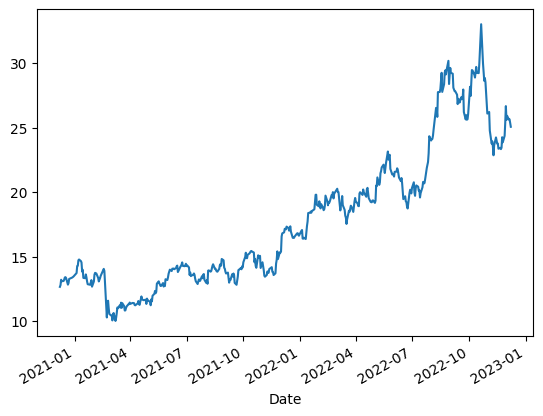

In [4]:
dados.Close.plot()

## Preparando os dados de treinamento

In [5]:
# resetando o índice do DataFrame
treinamento = dados.reset_index()

In [6]:
# retirando o timezone (fuso horário) da coluna de data
treinamento["Date"] = treinamento["Date"].dt.tz_localize(None)

In [7]:
# selecionando as colunas de data e valor de fechamento
treinamento = treinamento[['Date', 'Close']]

In [8]:
# renomeando as colunas (o Prophet precisa receber os dados com esse padrão)
treinamento.columns = ['ds', 'y']

## Treinando o nosso modelo

In [9]:
# criando o modelo
modelo = Prophet()

# treinando o modelo com os dados de treinamento
modelo.fit(treinamento)

# especificando o período das previsões (em dias)
periodo = modelo.make_future_dataframe(periods=90)

# gerando as previsões
previsoes = modelo.predict(periodo)


16:18:10 - cmdstanpy - INFO - Chain [1] start processing
16:18:10 - cmdstanpy - INFO - Chain [1] done processing


## Gerando o gráfico de previsões

In [ ]:
plot_plotly(modelo, previsoes, xlabel = "período", ylabel="valor")